In [19]:
from tifffile import imread
import matplotlib.pyplot as plt
import numpy as np

In [20]:
phc_good_path = "../data/p000c000.tif"
fluor_good_path = "../data/p000c001.tif"
phc_bubble_path = "../data/p016c000.tif"
fluor_bubble_path = "../data/p016c001.tif"

phc_good = imread(phc_good_path)
fluor_good = imread(fluor_good_path)
phc_bubble = imread(phc_bubble_path)
fluor_bubble = imread(fluor_bubble_path)

In [21]:
phc_good.shape, phc_good.dtype, phc_good.nbytes/1e9

((181, 2044, 2048), dtype('uint16'), 1.515372544)

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), constrained_layout=True)
axs[0, 0].imshow(phc_good[100])
axs[0, 0].set_title('PHC good')
axs[0, 1].imshow(fluor_good[100])
axs[0, 1].set_title('Fluor good')
axs[1, 0].imshow(phc_bubble[100])
axs[1, 0].set_title('PHC bubble' )
axs[1, 1].imshow(fluor_bubble[100])
axs[1, 1].set_title('Fluor bubble')
for ax in axs.flat:
    ax.axis('off')
plt.show()

KeyboardInterrupt: 

In [ ]:
def progress_callback(current, total, message):
    if current % 30 == 0:
        print(f"{message}: {current}/{total}")

In [ ]:
from pyama_core.processing.segmentation import segment_cell

In [ ]:
try:
    seg_good = np.load("seg_good.npy")
except FileNotFoundError:
    seg_good = np.empty_like(phc_good, dtype=bool)
    segment_cell(phc_good, seg_good, progress_callback)

In [ ]:
seg_good.shape, seg_good.dtype, seg_good.nbytes/1e9

((181, 2044, 2048), dtype('bool'), 0.757686272)

In [ ]:
np.save("seg_good.npy", seg_good)

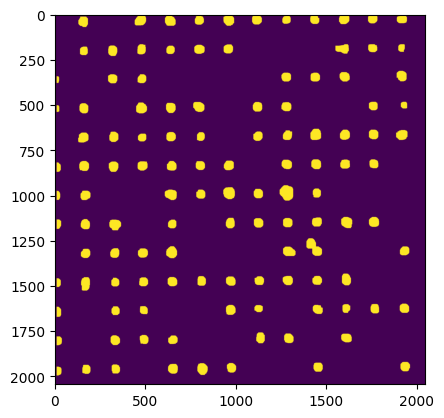

In [ ]:
plt.imshow(seg_good[100])
plt.show()

In [ ]:
from pyama_core.processing.background import correct_bg

In [ ]:
try:
    corrected_good = np.load("corrected_good.npy")
except FileNotFoundError:
    corrected_good = np.empty_like(fluor_good, dtype=np.float32)
    correct_bg(fluor_good, seg_good, corrected_good, progress_callback)

In [ ]:
corrected_good.shape, corrected_good.dtype, corrected_good.nbytes/1e9

((181, 2044, 2048), dtype('float32'), 3.030745088)

In [ ]:
np.save("corrected_good.npy", corrected_good)

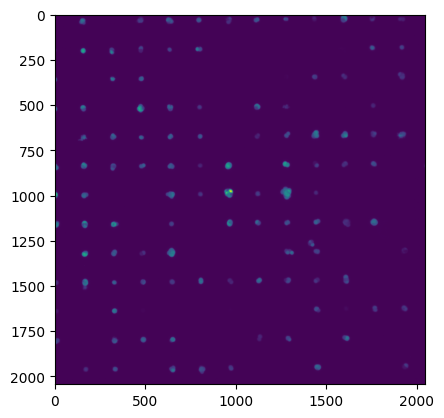

In [ ]:
plt.imshow(corrected_good[100])
plt.show()

In [ ]:
from pyama_core.processing.tracking import track_cell

In [ ]:
labeled_stack = track_cell(seg_good, progress_callback=progress_callback)

121
Labeling/regionprops: 0/181
119
118
120
120
120
122
119
119
119
120
119
120
120
120
119
122
120
120
120
119
120
120
120
120
119
120
118
118
118
119
Labeling/regionprops: 30/181
118
119
120
118
119
118
118
118
118
119
119
119
119
120
119
118
119
118
118
118
119
118
118
119
119
118
119
119
119
119
Labeling/regionprops: 60/181
119
118
119
119
118
118
118
118
118
118
119
118
119
119
119
120
118
118
118
118
118
118
118
119
118
118
119
119
119
120
Labeling/regionprops: 90/181
118
119
118
119
119
118
119
119
119
118
119
119
119
119
119
119
119
119
119
119
118
119
119
119
119
118
119
119
119
119
Labeling/regionprops: 120/181
119
119
119
120
119
119
119
119
119
119
119
119
119
119
120
119
119
120
119
119
119
119
119
119
119
119
119
119
119
119
Labeling/regionprops: 150/181
119
120
120
121
121
120
120
119
120
120
119
121
121
120
121
121
120
121
120
120
120
119
118
120
121
121
121
121
120
121
Labeling/regionprops: 180/181
Tracking: 30/181
Tracking: 60/181
Tracking: 90/181
Tracking: 120/181
Tr

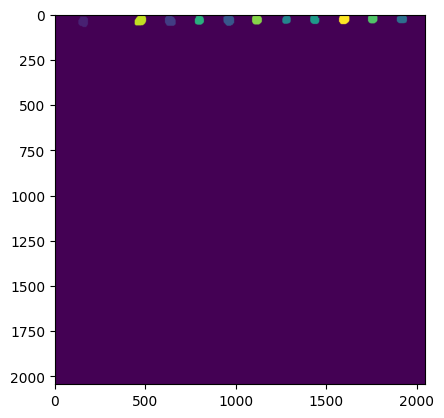

In [ ]:
plt.imshow(labeled_stack[100])
plt.show()